<h1 style="text-align:center;"> Python y la Radiación del Fondo Cósmico de Microondas </h1> 
<h1 style="text-align:center;"> Python y la Cosmic Microwave Background (CMB) Radiation </h1> 

<h1 style="text-align:center;">
Una mirada detallada al CMB </h1> 


La primera medida de precisión del CMB fue realizada por el satélite COBE con sus instrumentos FIRAS y DMR. FIRAS comprobó que la radiación de fondo corresponde a un cuerpo negro a una temperatura de 2.725K

![BlackBody](./BlackBody.png)

El instrumento DMR buscaba las anisotropías en el CMB, pequeñas
fluctuaciones térmicas en la radiación causada por la presencia
de materia. 

El CMB es isotrópico, es decir se observa igual independientemente 
de la dirección observada; pero hay efectos que distorcionan esta 
propiedad del CMB.

El movimiento del Sistema Solar respecto al CMB causa un dipolo en el cielo.  El Sistema Solar se mueve en dirección de la constelación de Leo y se aleja de la constelación de Aquarius.  Esto provoca que los fotones que vienen de esa dirección estén un poco más calientes y que los que vienen de la dirección de Aquaius estén más fríos. Una variación muy pequeña, 0.0033 K por arriba o por abajo de la temperatura media de 2.725 K. 

![Dipolo](./Dipolo.png)

Toda nuestra galaxia, de hecho, todo nuestro grupo local se mueve a 
620km/s hacia el supercúmulo de Hydra-Centaurus.  Un enorme grupo de
galaxias visibles y materia obscura se encuentran en esa dirección, generando una gran atracción gravitacional. Es conocido como el Great Attractor.
La existencia de estas super acumulaciones de materia, indica que el Universo a escalas por debajo de los 100 Mpc es bastante aterronado y que solamente a escalas grandes es homogeneo e isotrópico.

El Universo era un plasma opaco y caliente durante sus primeros 380000 años.  La energía y la materia, existían en un estado de continua interacción, donde la energía dominaba y evitaba que se formaran estructuras como átomos.
Cuando la temperatura del Universo bajó lo suficiente, los átomos se empezaron a formar y entonce la materia empezó a dominar a la energía.
Esta temperatura era de 3000K. A un redshift cosmológico de z=1100, es decir 380000 años de edad del UNIVERSO

![Antes de la recombinación](./BeforeRecomb.png)

![Después de la recombinación](./AfterRecomb.png)

La acumulación de materia que vemos hoy, como el Great Attractor, proviene de pequeñas fluctuaciones en el CMB. Después de limpiar el dipolo y el cuadripolo galáctico del CMB, quedan fluctuaciones de varias decenas de micro kelvin por debajo y por encima de la temperatura media.  Esto es un indicio de que la distribución de materia y energía en el Universo temprano no era del todo uniforme, en el momento de recombinación. La huella de esa distribución de materia quedó preservada en el CMB.

![Geometry of the Universe](./Shape.png)

# Ondas de Sonido en el Universo Temprano

La distintas cantidades de masa (compresión y rarefacción) causan que los fotones sufran corrimientos en temperatura; los fotones al salir de una zona de baja cantidad de materia (rarefacción del fluido) sufre un corrimiento hacia altas temperaturas; y cuando sale de una zona de alto contenido de materia (compresión del fluido) sufre un corriemiento hacia mayores frecuencias, es decir una temperatura más fría.  Los parches fríos y calientes en el CMB reflejan la distribución de materia. 
El movimiento de materia causaba ondas de sonido desplazandose por el fluido primordial; la naturaleza de estas ondas de sonido permite conocer parámetros como la edad del Universo, la distribución de los constituyentes del Universo (materia obscura, materia bariónica y energía obscura), el valor de la constante de Hubble, etc.

La frecuencia y tamaño de estos parches se representa con un espectro de potencia. En este espectro los picos corresponden a la mayor frecuencia de ciertos tamaños de parches. El más frecuente es el de 1 grado, en la época de recombinación esa distancia angular correspondía a un área de 1 millón de años luz; ahora ese ángulo corresponde a más de mil millones de años luz (z=1100).

![Espectro de potencias](./Cls.png)

In [6]:
%matplotlib inline
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
print('Using CAMB installed at '+ os.path.realpath(os.path.join(os.getcwd(),'..')))
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
import camb
from camb import model, initialpower

Using CAMB installed at /Users/jgallegos/Courses_Projects/UVG Project/Courses/Astrofisica Computacional/Jupyter_Notebooks


In [8]:
# Primero los parámetros
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [9]:
# obtenemos los resultados de este espectro de potencias
results=camb.get_results(pars)

In [11]:
# veamos el diccionario del espectro de potencia en CAMB
powers=results.get_cmb_power_spectra(pars)
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


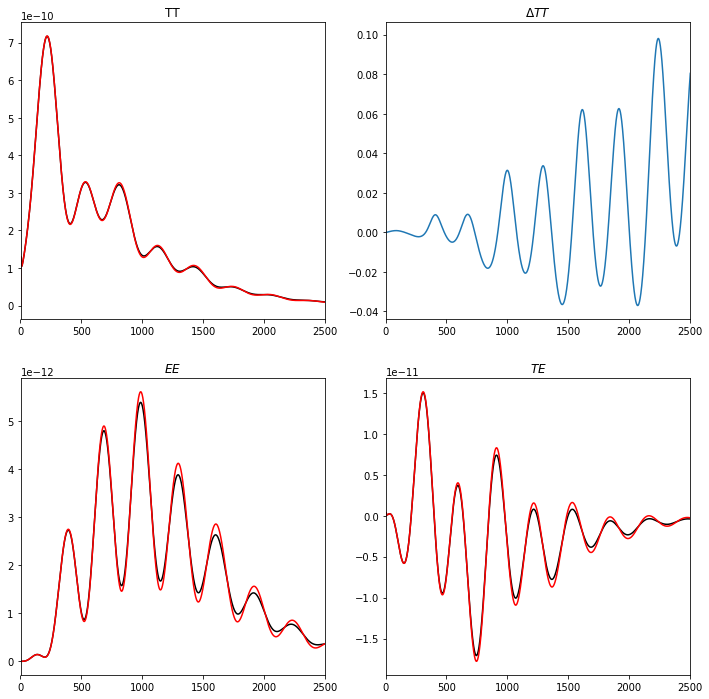

In [13]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
#los distintos arrays de CL son TT, EE, BB, TE (BB=0 para unlensed)
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='r')
ax[0,0].set_title('TT')
ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[0,1].set_title(r'$\Delta TT$')
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='r')
ax[1,0].set_title(r'$EE$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='r')
ax[1,1].set_title(r'$TE$');
for ax in ax.reshape(-1): ax.set_xlim([2,2500])